<a href="https://colab.research.google.com/github/Sachini007/Codefest-Datathon/blob/main/Risk_Analysis_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Datapath = '/content/drive/MyDrive/Sliit datathon/LoanStats3a.csv'

In [ ]:
!pip install sweetviz

In [ ]:
!pip install jupyterthemes

### **Requirements**

In [ ]:
import numpy as np 
import pandas as pd 
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)
from sklearn.pipeline import Pipeline

from scipy.stats import boxcox
from scipy import stats
from jupyterthemes import jtplot

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

## **Extract**

In [ ]:
df_org = pd.read_csv(Datapath, nrows=39787)
df_org.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0

In [ ]:
df_org.shape
df = df_org

In [ ]:
# Analyzing data

report = sv.analyze(df)

# Generating report
report.show_html('eda_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### **Data Cleaning**

Here data are cleaned by removing null values from the dataset.

In [ ]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

inq_fi                  100.0
mths_since_recent_bc    100.0
acc_open_past_24mths    100.0
avg_cur_bal             100.0
bc_open_to_buy          100.0
                        ...  
pub_rec                   0.0
open_acc                  0.0
hardship_flag             0.0
earliest_cr_line          0.0
inq_last_6mths            0.0
Length: 144, dtype: float64

Comuns with mean null percentage higher than 30% were removed.

In [ ]:
df = df[df.columns[((df.isnull().sum())/len(df)) < 0.3]]

In [ ]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

emp_title                     6.20
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
loan_status                   0.00
pymnt_plan                    0.00
debt_settlement_flag          0.00
purpose                       0.00
verification_status           0.00
zip_code                      0.00
addr_state                    0.00
issue_d                       0.00
sub_grade                     0.00
annual_inc                    0.00
home_ownership                0.00
delinq_2yrs                   0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
dti                 

In [ ]:
col_lst_unique = df.columns[df.dtypes == 'object'] #Columns with object datatype
col_lst_unique

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

Dropping Unnecessary Object Columns Based on the Objective.

In [ ]:
data = df.loc[:,['pymnt_plan','title','zip_code', 'addr_state', 'initial_list_status','hardship_flag','debt_settlement_flag','tax_liens','emp_title','application_type']]
df = df.drop(data, axis = 1)

Dropping Unnecessary Numerical Columns Based on the Objective.

In [ ]:
data = df.loc[:,['acc_now_delinq','chargeoff_within_12_mths','collection_recovery_fee','collections_12_mths_ex_med','delinq_amnt','policy_code']]
df = df.drop(data, axis = 1)

Identifying Unique Values in Object Columns

In [ ]:
col_lst_unique = df.columns[df.dtypes == 'object']
col_lst_unique

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [ ]:
#Print Unique Values
for col in col_lst_unique:
    print("Unique value in column ", col)
    print(df[col].unique(), '\n')

Removing Unnecessary Symbols and Strings

In [ ]:
#remove months from term
df['term'] = df['term'].astype(str).map(lambda x: x.lstrip(' ').rstrip('months'))

In [ ]:
#Remove percentage mark
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') 
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') 

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,Jan-15,171.62,May-19,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,Apr-13,119.66,Oct-16,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,Jun-14,649.91,Jun-17,0.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,Jan-15,357.48,Apr-16,0.0
4,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,other,17.94,0.0,Jan-96,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,Jan-17,67.30,Apr-18,0.0


Converting time data to numcerical values.

In [ ]:
col = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for i in col:
    df[i] = pd.to_datetime(df[i].str.upper(), format='%b-%y', yearfirst=False)

In [ ]:
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year  
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month  
df['last_pymnt_d_year'] = pd.DatetimeIndex(df['last_pymnt_d']).year  
df['last_pymnt_d_month'] = pd.DatetimeIndex(df['last_pymnt_d']).month 
df['last_credit_pull_d_year'] = pd.DatetimeIndex(df['last_credit_pull_d']).year  
df['last_credit_pull_d_month'] = pd.DatetimeIndex(df['last_credit_pull_d']).month 

In [ ]:
df.earliest_cr_line = 2021 - pd.DatetimeIndex(df['earliest_cr_line']).year 
df.issue_d_year = 2021 - (df.issue_d_year)

df.last_pymnt_d_year = 2021 - (df.last_pymnt_d_year)
df.last_credit_pull_d_year = 2021 - (df.last_credit_pull_d_year)

In [ ]:
df.drop(['issue_d','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

These are the final extracted features.

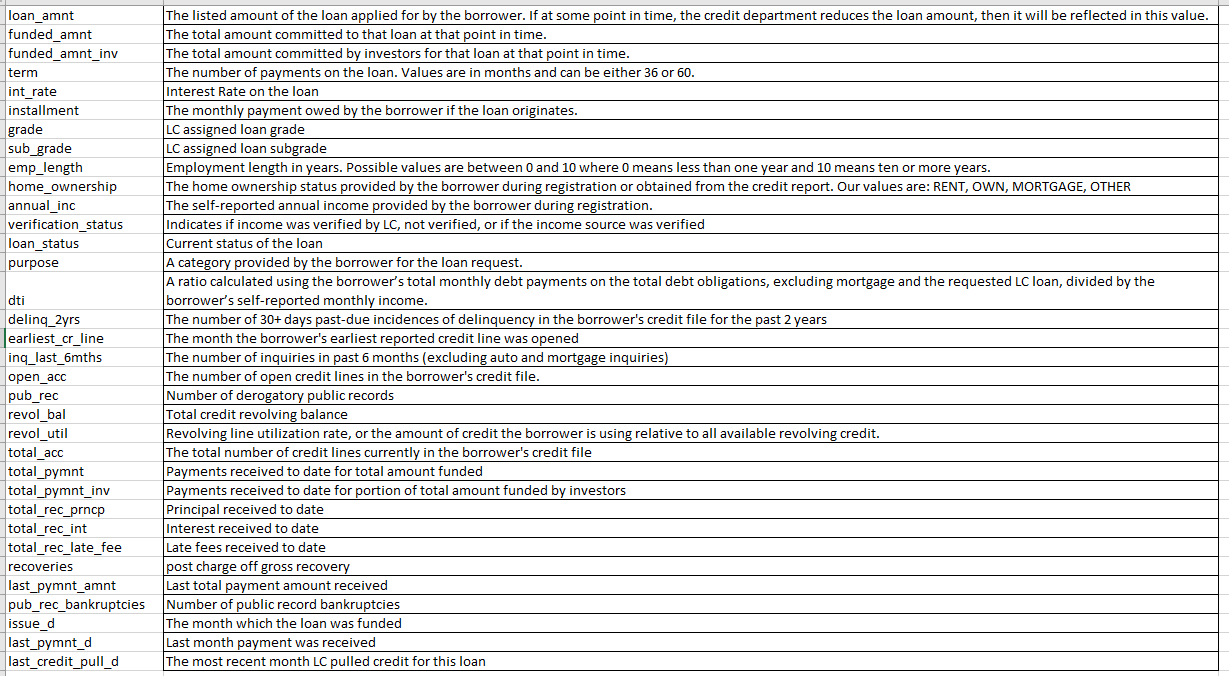

Remove rows with null values 

In [ ]:
df = df.dropna(subset = ['loan_status','last_pymnt_d_year','last_pymnt_d_month','last_credit_pull_d_month','last_credit_pull_d_year','delinq_2yrs'])
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

last_credit_pull_d_month    0.0
home_ownership              0.0
earliest_cr_line            0.0
delinq_2yrs                 0.0
dti                         0.0
purpose                     0.0
loan_status                 0.0
verification_status         0.0
annual_inc                  0.0
emp_length                  0.0
open_acc                    0.0
sub_grade                   0.0
grade                       0.0
installment                 0.0
int_rate                    0.0
term                        0.0
funded_amnt_inv             0.0
funded_amnt                 0.0
inq_last_6mths              0.0
pub_rec                     0.0
last_credit_pull_d_year     0.0
total_rec_late_fee          0.0
last_pymnt_d_month          0.0
last_pymnt_d_year           0.0
issue_d_month               0.0
issue_d_year                0.0
pub_rec_bankruptcies        0.0
last_pymnt_amnt             0.0
recoveries                  0.0
total_rec_int               0.0
revol_bal                   0.0
total_re

In [ ]:
# Checking two columns which are the same. 
df[df['out_prncp'] != df['out_prncp_inv']] # Both are same

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month


In [ ]:
# Dropping those columns to avoid multi-collinearity
df.drop('out_prncp_inv',axis=1,inplace = True)
df.drop('out_prncp',axis=1,inplace = True)

Data Warehousing

In [ ]:
df.to_csv('Dataset2_preprocessed.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39713 entries, 0 to 39785
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39713 non-null  float64
 1   funded_amnt               39713 non-null  float64
 2   funded_amnt_inv           39713 non-null  float64
 3   term                      39713 non-null  object 
 4   int_rate                  39713 non-null  float64
 5   installment               39713 non-null  float64
 6   grade                     39713 non-null  object 
 7   sub_grade                 39713 non-null  object 
 8   emp_length                39713 non-null  object 
 9   home_ownership            39713 non-null  object 
 10  annual_inc                39713 non-null  float64
 11  verification_status       39713 non-null  object 
 12  loan_status               39713 non-null  object 
 13  purpose                   39713 non-null  object 
 14  dti   

EDA

Loan Distributions

In [ ]:
# Set a new variable for the purpose of displaying the value counts of 'loan_status'
loan_status_counts = df['loan_status'].value_counts()

Text(0.5, 0, 'Count')

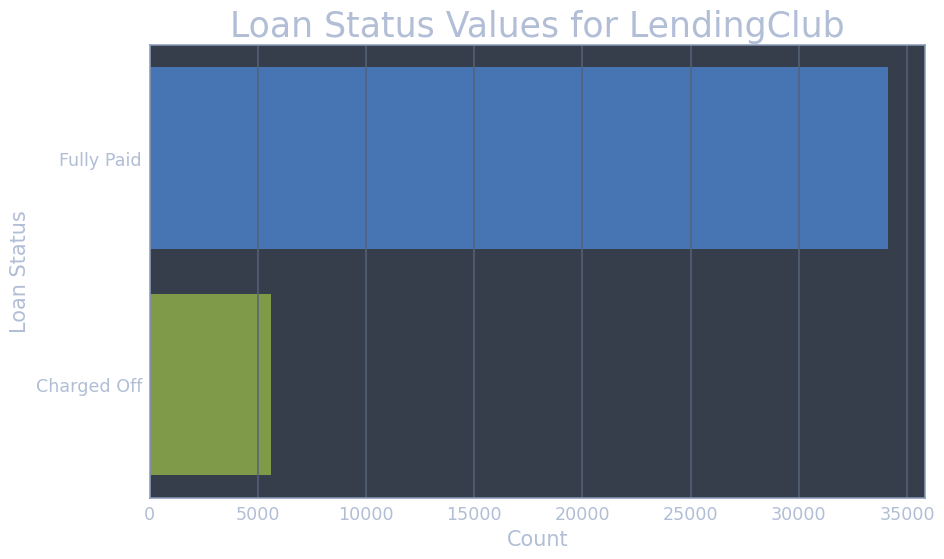

In [ ]:
# Plot the value counts
plt.figure(figsize=(10,6))
jtplot.style(theme='onedork')

sns.barplot(y=loan_status_counts.index, x=loan_status_counts)
plt.title('Loan Status Values for LendingClub', fontsize=25)
plt.ylabel('Loan Status', fontsize=15)
plt.xlabel('Count', fontsize=15)

In [ ]:
np.seterr(under='ignore')

{'divide': 'raise', 'invalid': 'raise', 'over': 'raise', 'under': 'raise'}

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


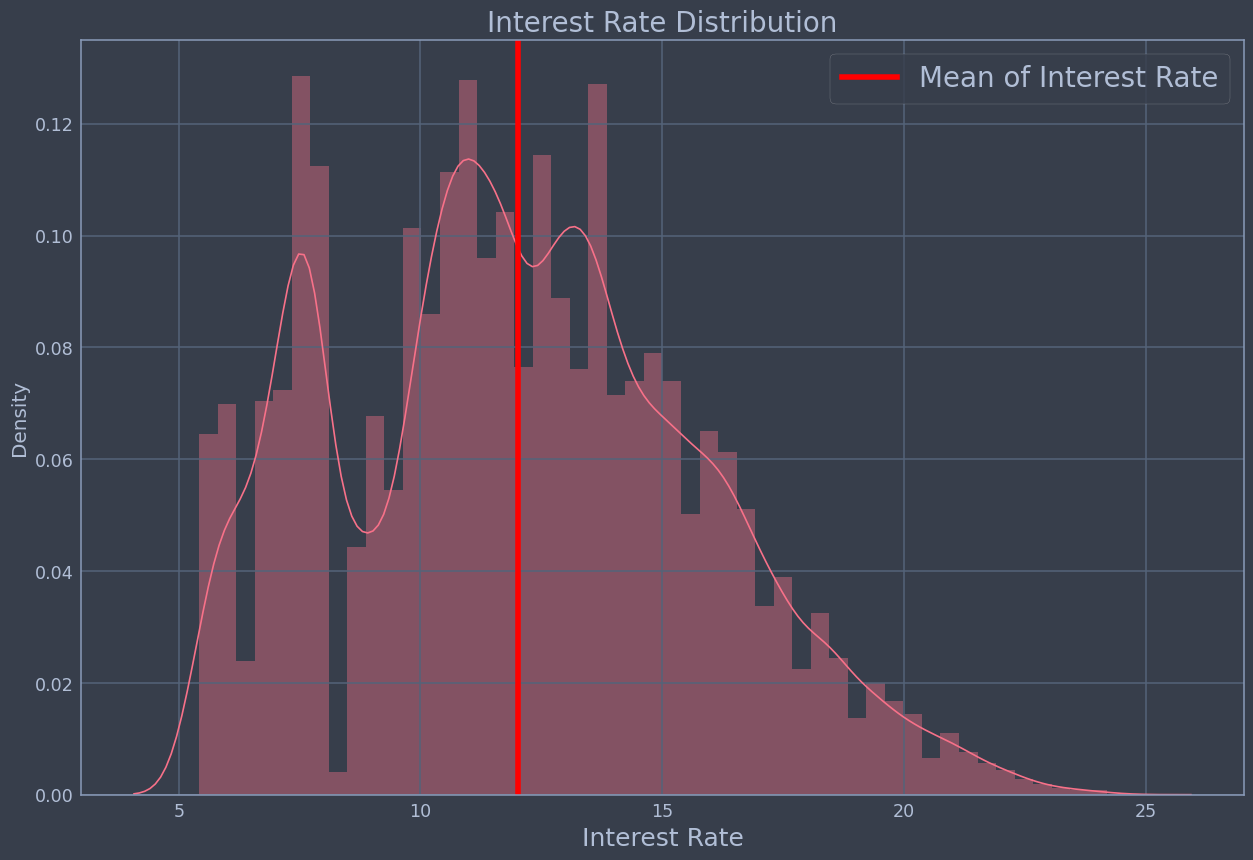

In [ ]:
# Visualize the distribution of interest rates
sns.set_palette("husl")
plt.figure(figsize=(15,10))
sns.distplot(df['int_rate'], hist='density')
plt.axvline(x=df.int_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
# plt.axvline(x=default_vis.int_rate.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


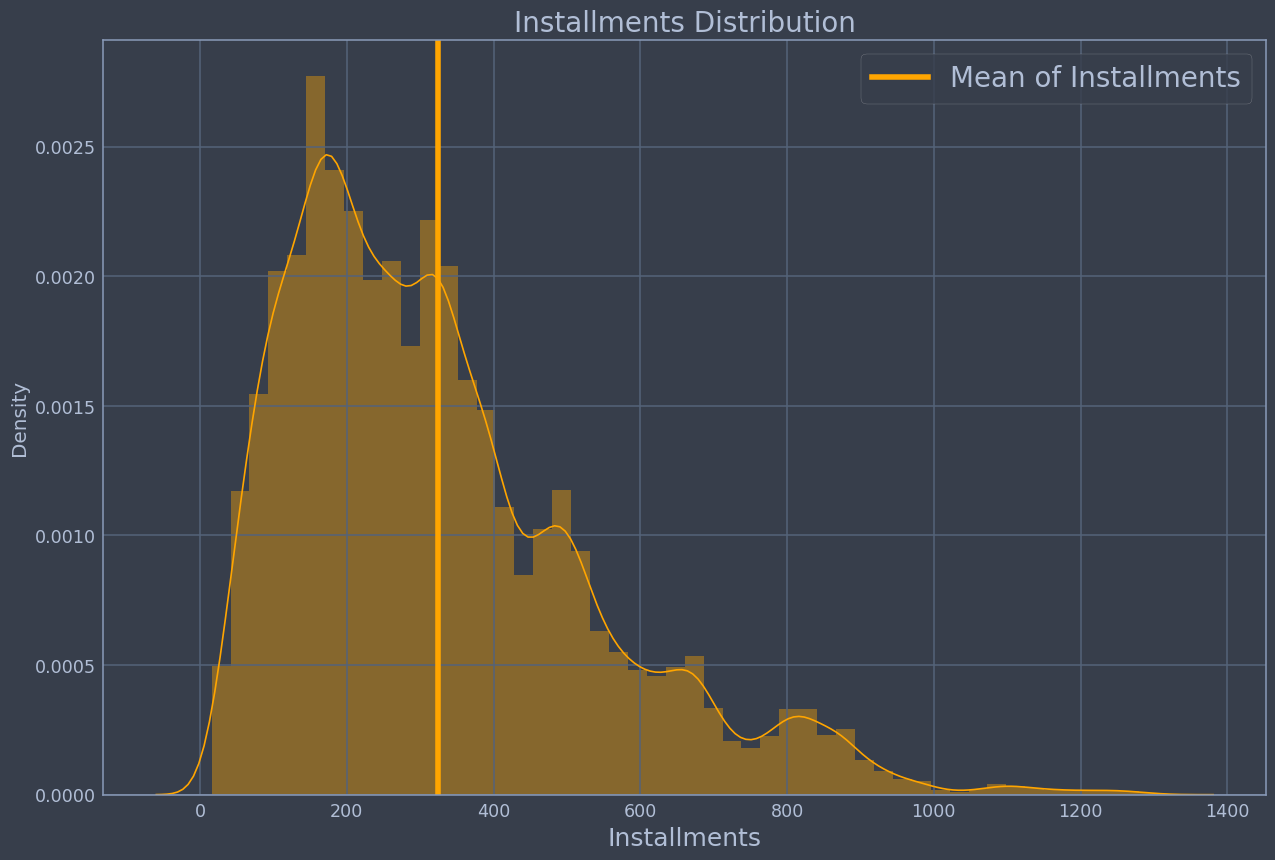

In [ ]:
# Visualize the distribution of installments
sns.set_palette("husl")
plt.figure(figsize=(15,10))
sns.distplot(df['installment'], hist='density', color='orange')
plt.axvline(x=df.installment.mean(), color='orange', linestyle='-', lw=4, label='Mean of Installments')
# plt.axvline(x=default_vis.installment.mean(), color='red', linestyle='-', lw=4, label='Mean of Defaulted Installments')
plt.title('Installments Distribution', fontsize=20)
plt.xlabel('Installments', fontsize=18)
plt.legend(fontsize=20)
plt.show()

Loan Grades

In [ ]:
grade_counts = df['grade'].value_counts()

Text(0.5, 0, 'Count')

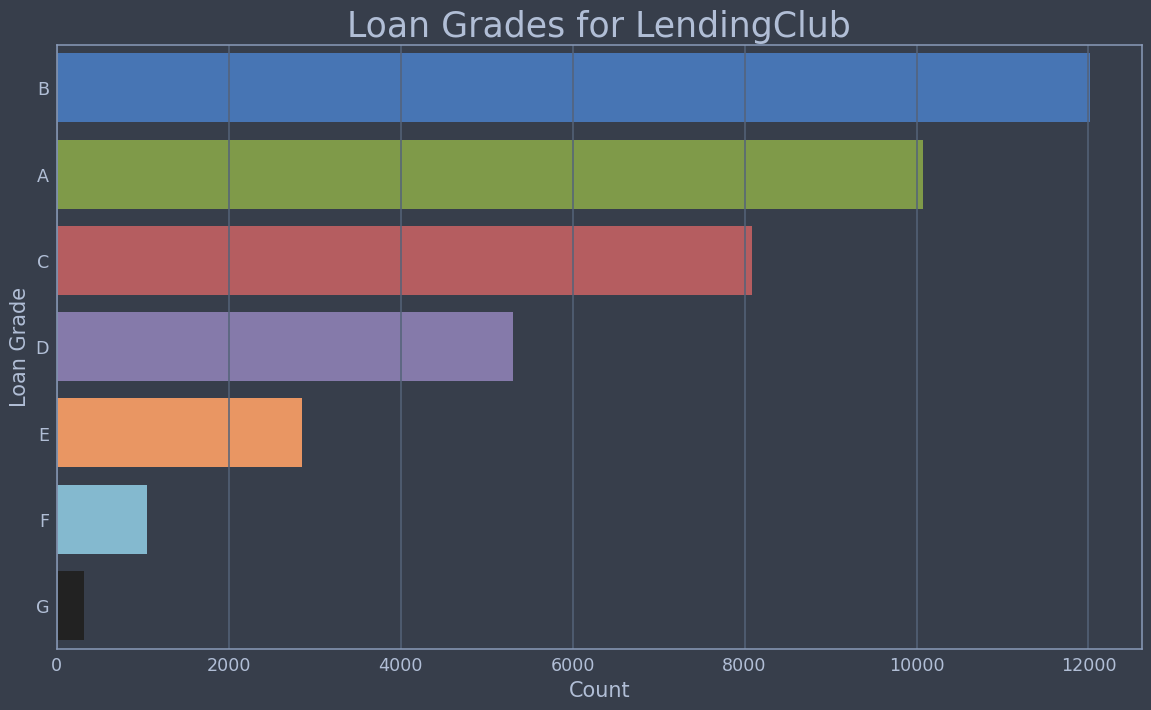

In [ ]:
# Plot the value counts
plt.figure(figsize=(14,8))
jtplot.style(theme='onedork')

sns.barplot(y=grade_counts.index, x=grade_counts)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

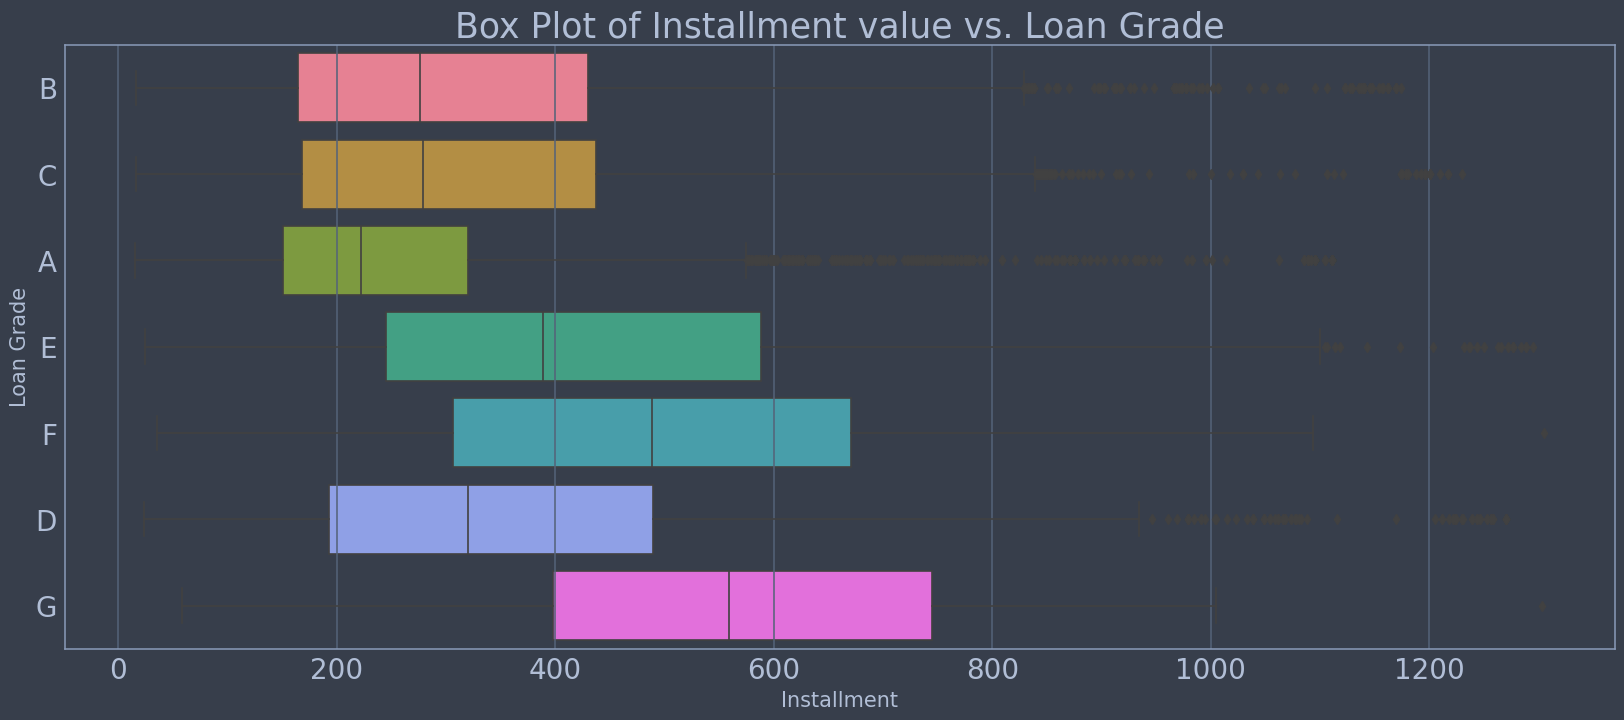

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(20,8))
sns.boxplot(x="installment", y="grade", data=df, palette="husl")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The  highest average installments have the lowest rated loans. Average installments seem to increase from D-grade moving down to G-grade. 

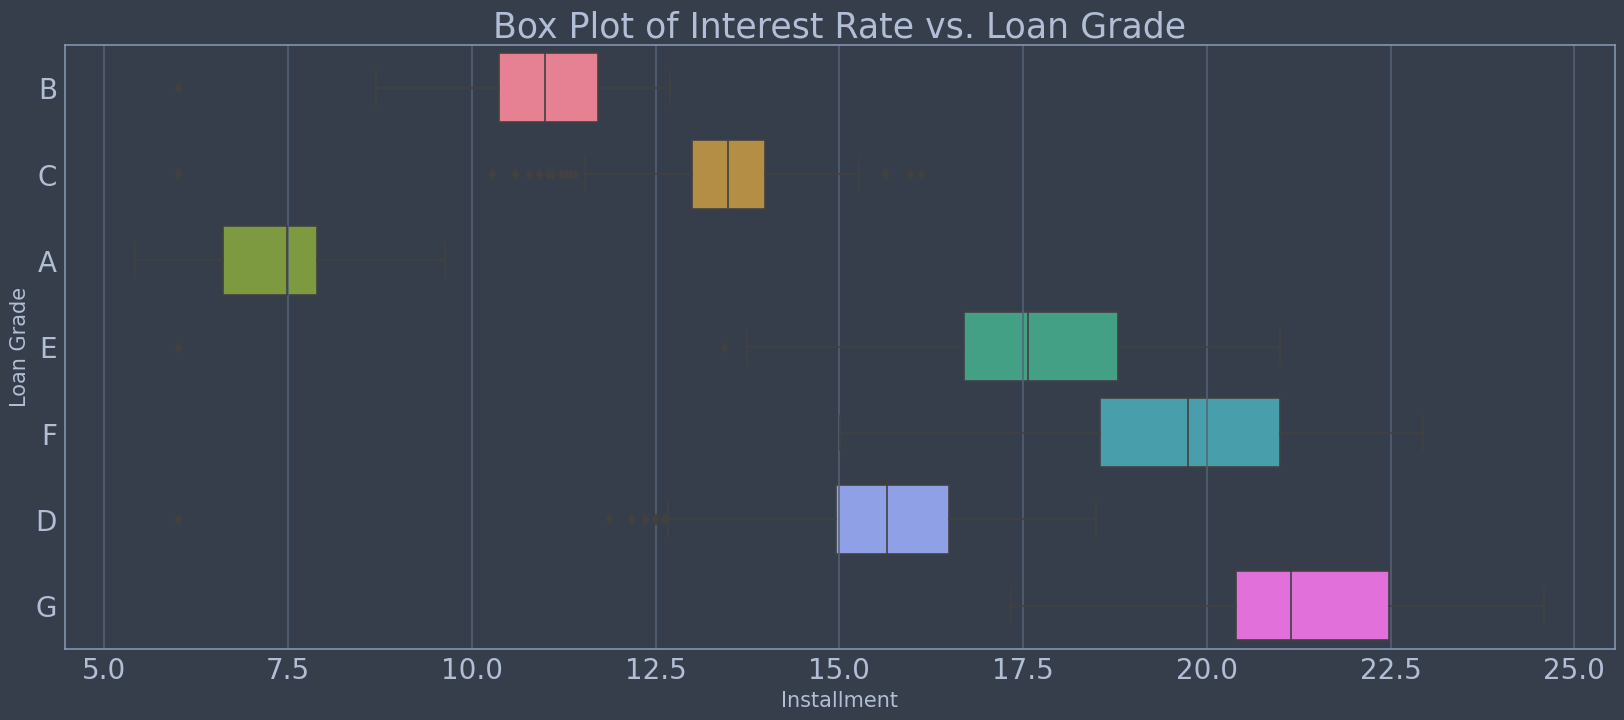

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(20,8))
sns.boxplot(x="int_rate", y="grade", data=df, palette="husl")
plt.title('Box Plot of Interest Rate vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

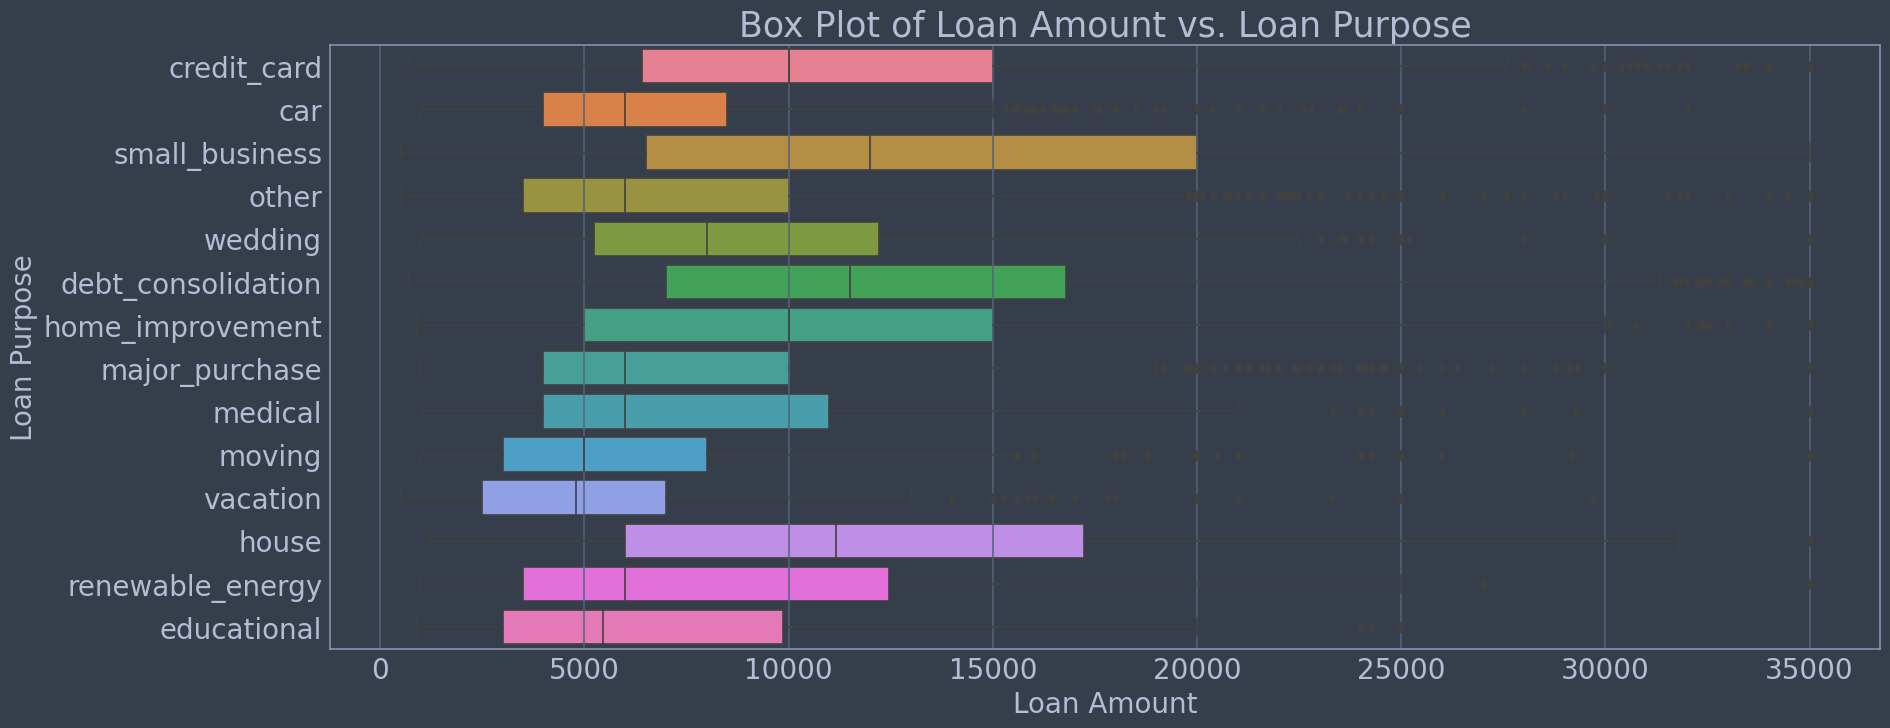

In [ ]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(20,8))
sns.boxplot(x="loan_amnt", y="purpose", data=df, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Converting categorical columns to Numerical using Orinal Encoder

In [ ]:
col_lst_unique = df.columns[df.dtypes == 'object']

ord_enc = OrdinalEncoder()
for col in col_lst_unique:
  df[col] = ord_enc.fit_transform(df[[col]])

In [ ]:
df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,5000.0,5000.0,4975.0,0.0,10.65,162.87,1.0,6.0,1.0,4.0,24000.0,2.0,1.0,1.0,27.65,0.0,36.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,171.62,0.0,10.0,12.0,6.0,1.0,2.0,5.0
1,2500.0,2500.0,2500.0,1.0,15.27,59.83,2.0,13.0,10.0,4.0,30000.0,1.0,0.0,0.0,1.00,0.0,22.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.90,119.66,0.0,10.0,12.0,8.0,4.0,5.0,10.0
2,2400.0,2400.0,2400.0,0.0,15.96,84.33,2.0,14.0,1.0,4.0,12252.0,0.0,1.0,11.0,8.72,0.0,20.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,649.91,0.0,10.0,12.0,7.0,6.0,4.0,6.0
3,10000.0,10000.0,10000.0,0.0,13.49,339.31,2.0,10.0,1.0,4.0,49200.0,1.0,1.0,9.0,20.00,0.0,25.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,357.48,0.0,10.0,12.0,6.0,1.0,5.0,4.0
4,3000.0,3000.0,3000.0,1.0,12.69,67.79,1.0,9.0,0.0,4.0,80000.0,1.0,1.0,9.0,17.94,0.0,25.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.00,67.30,0.0,10.0,12.0,4.0,1.0,3.0,4.0
5,5000.0,5000.0,5000.0,0.0,7.90,156.46,0.0,3.0,3.0,4.0,36000.0,1.0,1.0,13.0,11.20,0.0,17.0,3.0,9.0,0.0,7963.0,28.3,12.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,161.03,0.0,10.0,12.0,6.0,1.0,4.0,2.0
6,7000.0,7000.0,7000.0,1.0,15.96,170.08,2.0,14.0,8.0,4.0,47004.0,0.0,1.0,2.0,23.51,0.0,16.0,1.0,7.0,0.0,17726.0,85.6,11.0,10137.840010,10137.84,7000.00,3137.84,0.00,0.00,1313.76,0.0,10.0,12.0,5.0,5.0,3.0,12.0
7,3000.0,3000.0,3000.0,0.0,18.64,109.43,4.0,20.0,9.0,4.0,48000.0,1.0,1.0,0.0,5.35,0.0,14.0,2.0,4.0,0.0,8221.0,87.5,4.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,111.34,0.0,10.0,12.0,6.0,1.0,7.0,12.0
8,5600.0,5600.0,5600.0,1.0,21.28,152.39,5.0,26.0,4.0,3.0,40000.0,1.0,0.0,11.0,5.55,0.0,17.0,2.0,11.0,0.0,5210.0,32.6,13.0,647.500000,647.50,162.02,294.94,0.00,190.54,152.39,0.0,10.0,12.0,9.0,4.0,5.0,10.0
9,5375.0,5375.0,5350.0,1.0,12.69,121.45,1.0,9.0,10.0,4.0,15000.0,2.0,0.0,9.0,18.08,0.0,17.0,0.0,2.0,0.0,9279.0,36.5,3.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,121.45,0.0,10.0,12.0,9.0,11.0,5.0,12.0


In [ ]:
for col in col_lst_unique:
    print("Unique value in column ", col)
    print(df[col].unique(), '\n')

Unique value in column  term
[0. 1.] 

Unique value in column  grade
[1. 2. 0. 4. 5. 3. 6.] 

Unique value in column  sub_grade
[ 6. 13. 14. 10.  9.  3. 20. 26. 12.  5. 15.  0.  7.  8. 16.  2.  4. 19.
  1. 23. 17. 11. 18. 27. 22. 28. 25. 24. 33. 21. 32. 31. 30. 29. 34.] 

Unique value in column  emp_length
[ 1. 10.  0.  3.  8.  9.  4.  5.  6.  2.  7.] 

Unique value in column  home_ownership
[4. 3. 0. 2. 1.] 

Unique value in column  verification_status
[2. 1. 0.] 

Unique value in column  loan_status
[1. 0.] 

Unique value in column  purpose
[ 1.  0. 11.  9. 13.  2.  4.  6.  7.  8. 12.  5. 10.  3.] 



Heat Map

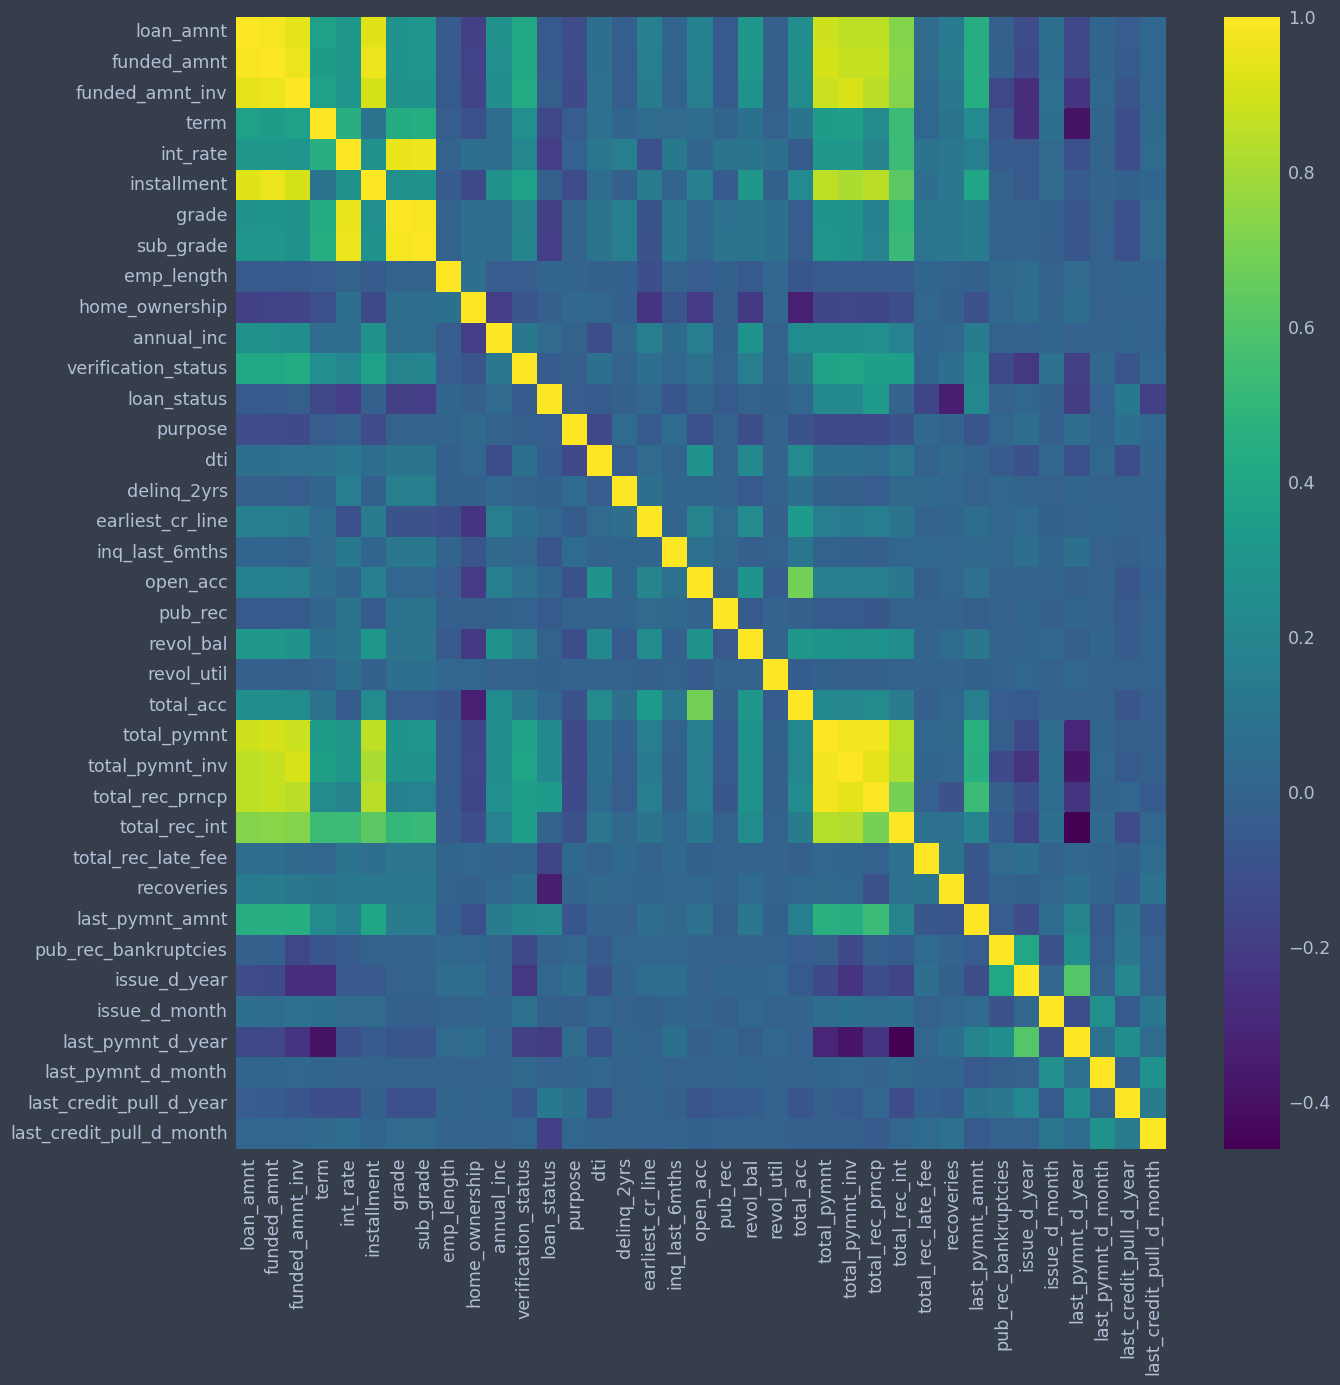

In [ ]:
#Heat Map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='viridis')

Model Preparation

In [ ]:
Y = df['loan_status']
X = df.drop('loan_status', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)   #Split the train data set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31770, 36), (7943, 36), (31770,), (7943,))

In [ ]:
#Normalize Numerical Columns
from sklearn.preprocessing import StandardScaler
columns = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_amnt','pub_rec_bankruptcies']

stan_scaler = StandardScaler()
for col in columns:
  X_train[[col]] = stan_scaler.fit_transform(X_train[[col]])
  X_test[[col]] = stan_scaler.transform(X_test[[col]])
  


In [ ]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
12711,2.521439,2.652269,2.716530,0.0,-0.948733,2.979489,0.0,4.0,1.0,0.0,1.308619,2.0,4.0,-0.471410,-0.299265,25.0,0.126034,0.390048,-0.232926,-0.603295,-0.133751,1.571293,2.310080,2.369121,30000.00,0.434181,-0.187982,-0.138483,2.017685,-0.133248,10.0,7.0,8.0,6.0,3.0,10.0
4259,-0.700780,-0.689270,-0.617759,0.0,-0.370031,-0.618385,1.0,6.0,1.0,4.0,-0.861837,2.0,2.0,0.595760,1.764922,19.0,0.126034,-0.749702,-0.232926,-0.194642,-0.046836,-0.445166,-0.569067,-0.510250,6000.00,-0.473738,-0.187982,-0.138483,-0.557826,-0.133248,10.0,11.0,7.0,11.0,2.0,4.0
35161,0.366580,0.417615,0.479743,0.0,-0.238752,0.636861,1.0,5.0,10.0,0.0,0.023250,0.0,1.0,-0.354665,-0.299265,27.0,-0.813893,-0.293802,-0.232926,0.918708,0.029504,1.132932,0.460669,0.513002,13950.00,0.091608,-0.187982,-0.138483,-0.499970,-0.133248,12.0,9.0,9.0,10.0,3.0,11.0
22577,1.715884,1.816884,1.892599,1.0,2.043904,1.468617,6.0,30.0,1.0,0.0,-0.003394,2.0,2.0,0.944499,-0.299265,34.0,0.126034,0.845947,-0.232926,0.097361,-0.003508,0.168539,1.492549,1.559398,24000.00,-0.133014,-0.187982,-0.138483,-0.509399,-0.133248,11.0,12.0,10.0,7.0,2.0,5.0
8857,0.306164,0.354961,0.434067,1.0,2.051942,0.147249,4.0,24.0,1.0,4.0,-0.639226,0.0,2.0,0.261989,-0.299265,18.0,0.126034,-0.749702,-0.232926,-0.003318,0.081601,-1.321887,-0.835552,-0.779311,1592.71,0.006468,-0.187982,0.843357,-0.523473,-0.133248,10.0,8.0,9.0,8.0,5.0,10.0


ML Models

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9706517047906776

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


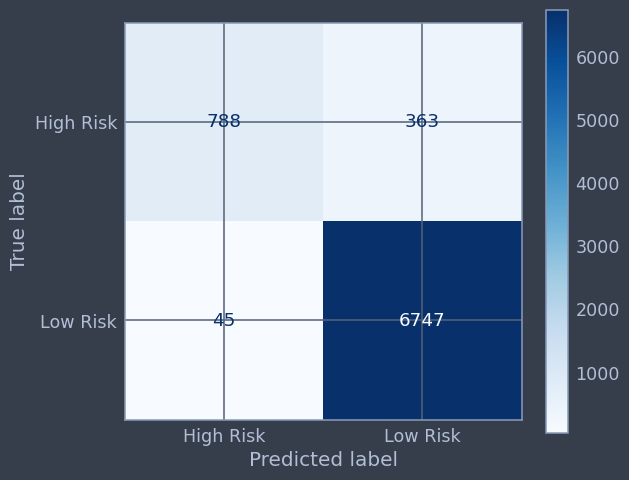

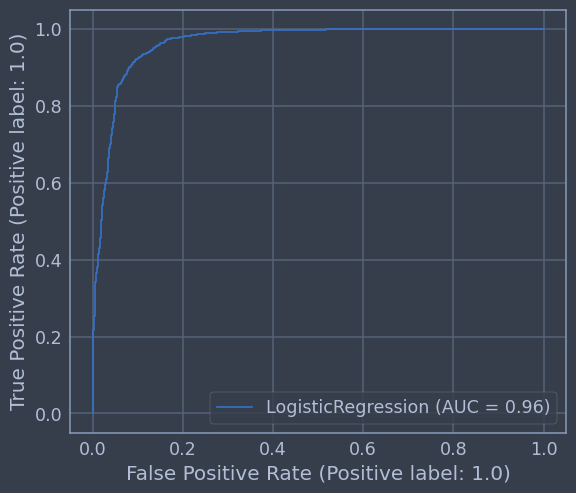

In [ ]:
disp = plot_confusion_matrix(
    lr, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['High Risk', 'Low Risk']
)

disp = plot_roc_curve(lr, X_test, y_test)

Random Forest

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
ypred = rf_clf.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.9995584988962471

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


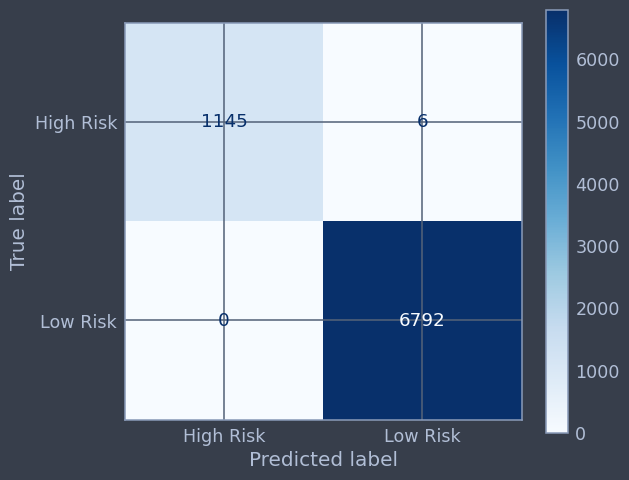

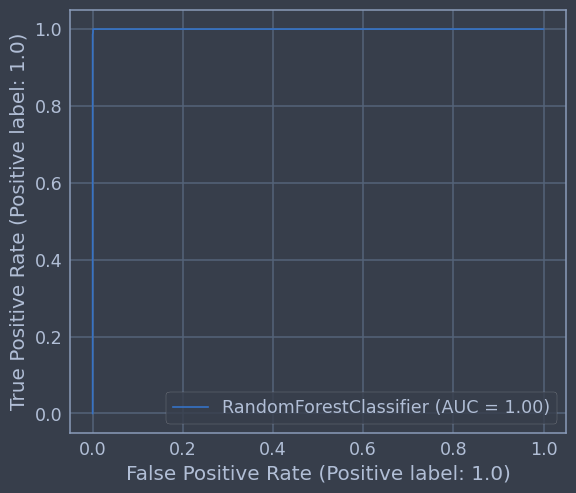

In [ ]:
disp = plot_confusion_matrix(
    rf_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['High Risk', 'Low Risk']
)

disp = plot_roc_curve(rf_clf, X_test, y_test)

Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
ypred = dt.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.9990427803549076

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


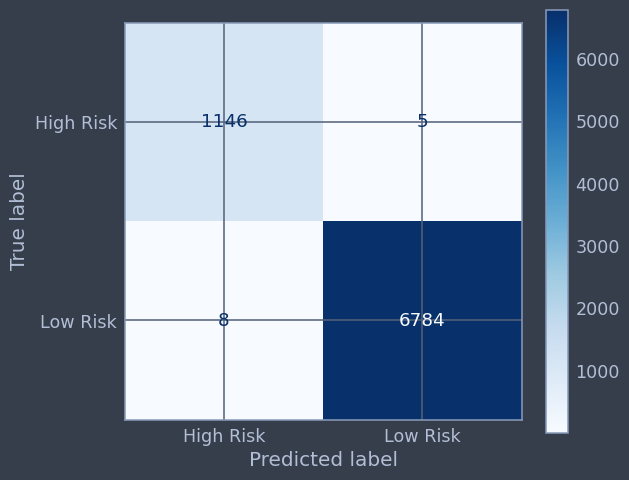

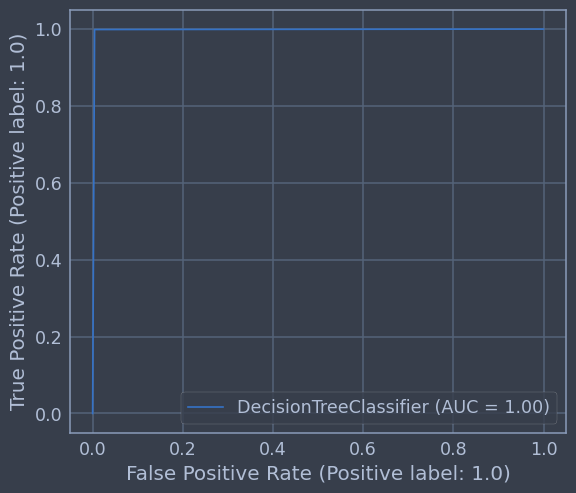

In [ ]:
disp = plot_confusion_matrix(
    dt, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['High Risk', 'Low Risk']
)

disp = plot_roc_curve(dt, X_test, y_test)

XGBoost

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
ypred = xgb_clf.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.9995584988962471

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


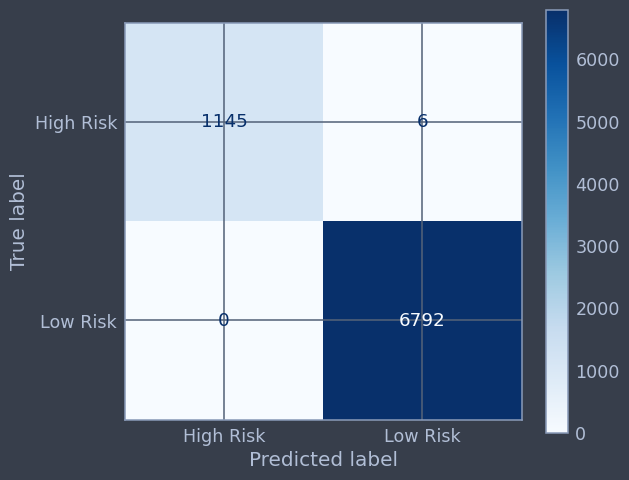

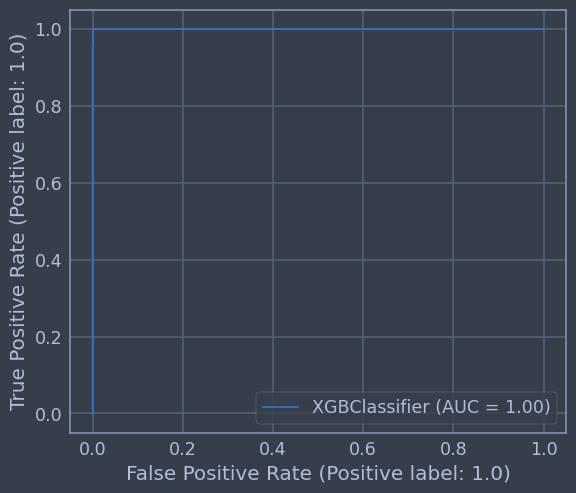

In [ ]:
disp = plot_confusion_matrix(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['High Risk', 'Low Risk']
)

disp = plot_roc_curve(xgb_clf, X_test, y_test)

Model Deployment

In [ ]:
from sklearn.compose import ColumnTransformer 
pre_process = ColumnTransformer([('scale_data', StandardScaler(),['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_amnt','pub_rec_bankruptcies'])])

In [ ]:
# define the stages of the pipeline
pipeline = Pipeline(steps= [
                            ('Scaling', pre_process),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('Scaling',
                 ColumnTransformer(transformers=[('scale_data',
                                                  StandardScaler(),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'int_rate', 'installment',
                                                   'annual_inc', 'dti',
                                                   'delinq_2yrs',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'revol_util', 'total_acc',
                                                   'total_pymnt',
                                                   'total_pymnt_inv',
                                                   'total_rec_int',
                                     

In [ ]:
pipeline.predict(X_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
# import joblib
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="Identifying_Defaulters.joblib")

['Identifying_Defaulters.joblib']

In [ ]:
test_file = pd.read_csv('/content/Test_file.csv')

In [ ]:
test_file.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,5000,5000,4975,0,10.65,162.87,1,6,1,4,24000,2,1,27.65,0,36,1,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0,10,12,6,1,2,5
1,2500,2500,2500,1,15.27,59.83,2,13,10,4,30000,1,0,1.00,0,22,5,3,0,1687,9.4,4,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0,10,12,8,4,5,10
2,2400,2400,2400,0,15.96,84.33,2,14,1,4,12252,0,11,8.72,0,20,2,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0,10,12,7,6,4,6
3,10000,10000,10000,0,13.49,339.31,2,10,1,4,49200,1,9,20.00,0,25,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0,10,12,6,1,5,4
4,3000,3000,3000,1,12.69,67.79,1,9,0,4,80000,1,9,17.94,0,25,0,15,0,27783,53.9,38,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0,10,12,4,1,3,4


In [ ]:
# import joblib
from joblib import load

# load the saved pipleine model
pipeline = load("Identifying_Defaulters.joblib")

# predict on the sample tweet text
pipeline.predict(test_file)

array([1., 0., 1., 1., 1., 1.])

In [ ]:
!pip install flask-ngrok


from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/")
def home():
    return "<h1>GFG is great platform to learn</h1>"
    
app.run()

  Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://725c-35-231-114-23.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
# get importance
importance = dt.coef_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: ignored

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31770 entries, 12711 to 33062
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 31770 non-null  float64
 1   funded_amnt               31770 non-null  float64
 2   funded_amnt_inv           31770 non-null  float64
 3   term                      31770 non-null  float64
 4   int_rate                  31770 non-null  float64
 5   installment               31770 non-null  float64
 6   grade                     31770 non-null  float64
 7   sub_grade                 31770 non-null  float64
 8   emp_length                31770 non-null  float64
 9   home_ownership            31770 non-null  float64
 10  annual_inc                31770 non-null  float64
 11  verification_status       31770 non-null  float64
 12  purpose                   31770 non-null  float64
 13  dti                       31770 non-null  float64
 14  de

[1.91517208e-02 3.49056840e-02 1.90384549e-02 5.37985556e-03
 4.94139584e-03 2.49580854e-02 1.71009468e-03 3.08873908e-03
 4.19597865e-04 1.43428850e-04 1.04577987e-03 2.85938248e-04
 4.86424328e-04 9.85529761e-04 1.40872109e-04 8.10481949e-04
 3.60731072e-04 6.36526129e-04 1.05088990e-04 8.38719302e-04
 1.23566387e-03 7.92519011e-04 3.72513352e-02 2.87048214e-02
 1.05165408e-01 5.87560248e-03 4.93654417e-03 6.08003622e-01
 3.19561283e-02 2.30737670e-04 1.88336354e-03 6.11254144e-04
 1.38119920e-02 8.06190586e-04 1.97716525e-02 1.95300162e-02]


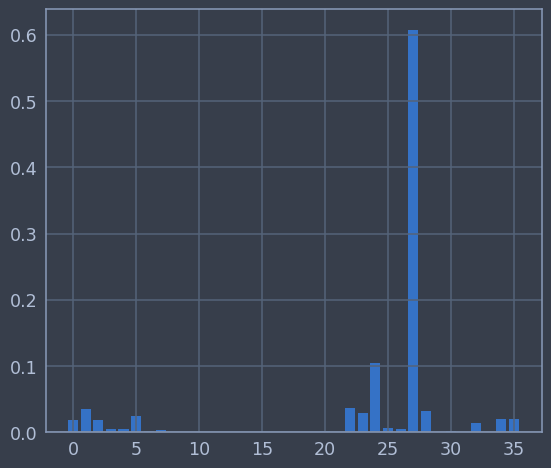

In [ ]:
# feature importance
print(rf_clf.feature_importances_)
# plot
plt.bar(range(len(rf_clf.feature_importances_)), rf_clf.feature_importances_)
plt.show()

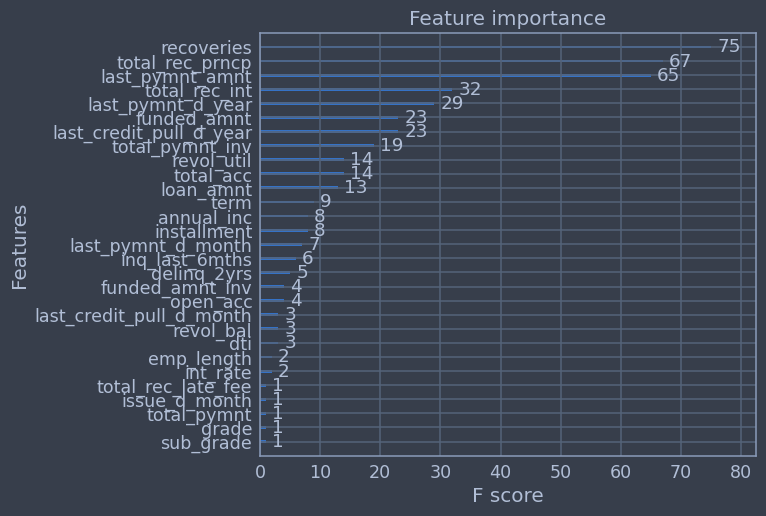

In [ ]:
from xgboost import plot_importance

# plot feature importance

plot_importance(xgb_clf)

plt.show()